# Test a Perceptual Phenomenon
## Hypothesis Test for Stroop Effect
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./stroopdata.csv')
print df.head()


   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803


### 1. What is our independent variable? What is our dependent variable?

In this problem we are given a list of two times for each trial. One time represents the time it take to recognize a **congruent** word and the the second represents the time it takes to recognize a **incongruent** word. Since the time recorded are dependent upon on whether the words presented where **congruent**  or **incongruent**, then we can say that the word's congruence is the *independent variable* and time taken to recognize the word as the *dependent variable*

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

As you will see below, by inspection of the descriptive statistics it seem that word congruence might affect the time it take to recognize a word. In the mean, min, 1st quartile, meadian, and 3rd quartile, and max time were high for words that were incongruent than for words that are congruent. There for I would state my *null Hypothesis* H<sub>0</sub> and my *alternative hypothesis* H<sub>1</sub> as follows:
- H<sub>0</sub>: $\mu ( t_c )$ = 14.051125	
- H<sub>1</sub>: $\mu ( t_i )$ > 14.051125	

*where t<sub>c</sub> is the time taken to recognize a congruent word and t<sub>i</sub> is the time take to recognize a incongruent word*

Since the sample size is under 30 our data will not be normally distrubed. It will fit a t-distribution. Therefore we will use a student t test. We will reject H<sub>0</sub> if $P(\bar{X}=22.015917)< \alpha$

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


##### Central Tendency
As we can see from the chart above the means is for the congruent word time and the incongruent word time are 14.051125	and 22.015917 respectively. We can also observe the means is for the congruent word time and the incongruent word time are 14.356500 and 21.017500 respectively.

##### Variability
We can also observe the standard deviation for the congruent word time and the incongruent word time are 3.559358 and 4.797057 respectively.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

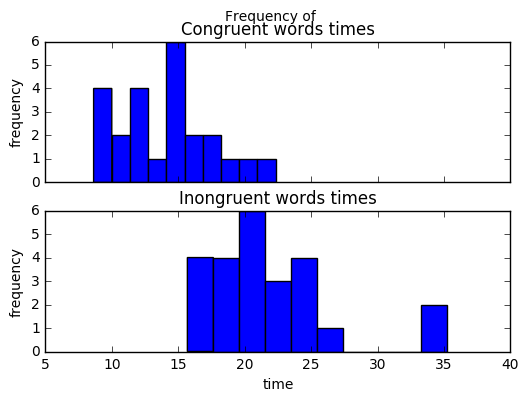

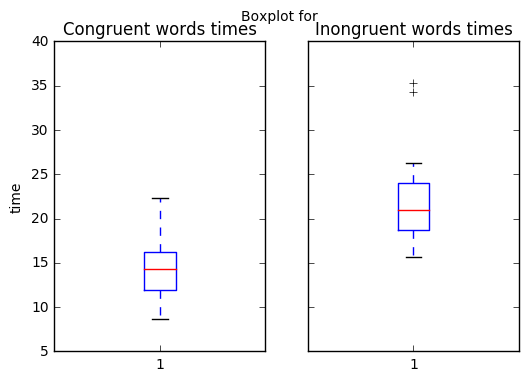

In [72]:
x = df['Congruent']
y = df['Incongruent']

# Two subplots, unpack the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Frequency of')
ax1.hist(x)
ax1.set_title('Congruent words times')
ax1.set_ylabel('frequency') 
ax2.hist(y)
ax2.set_title('InCongruent words times')
ax2.set_xlabel('time') 
ax2.set_ylabel('frequency') 

f, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
f.suptitle('Boxplot for')
ax3.boxplot(x)
ax3.set_title('Congruent words times')
ax3.set_ylabel('time') 
ax4.boxplot(y)
ax4.set_title('Inongruent words times')
plt.show()

From the first two histograms we can see more about the distribution of data between both congruent and incongruent trials. We can clearly see there is more variability and a lower mean  with congruent words. We also see something similar with the last two boxplots however we can now visualize two outliers in the incongruent word times and quantile statistics most of which are lower for congruent word times than incongruent word times.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [81]:
import scipy.stats as st
t, prob = st.ttest_1samp(df['Incongruent'], df['Congruent'].mean())
print("t = "+ str(t))
print("prob = "+ str(prob))

t = 8.13401841705
prob = 3.22160640062e-08


If we set $\alpha$ equal to .01 then our confidence level is 0.99. Our critical statistic in this instance is a t-statistic who value is 8.13401841705. Since $P(\bar{X}=22.015917)< \alpha$ we will reject H<sub>0</sub>. I beleive that there is enough evidence to warrent that a words congruencr can effect the time it take to be read. These results are similar to what I would have guessed they would be.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Responding to incongruent stimuli responses in the brain cause a moment of indecision called interference. Other sensory modalities and variables can be used to conduct modified Stroop test. The test could be reversed, or include warped words. The Stroop test has also been applied to emotions and spacial stimuli. One case I find interesting is ask which number is bigger when the number are different font sizes.